# Notebook 6 - Neural Networks (MLP)

CSI4106 Artificial Intelligence  
Fall 2020  
Prepared by Julian Templeton and Caroline Barrière

***INTRODUCTION***:  

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission to a hospital, provided a certain set of features describing their physical state, the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered. The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of three packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, (2) **pandas**, a must-have for data science, and (3) **matplotlib** which is a great plotting library (pip install matplotlib).  Make sure you have the LATEST version of scikit-learn (at least version >= 0.20), otherwise some functions (the one-hot-encoder) will not work.

As this is your 6th notebook this semester, some instructions will be a bit less explicit and may require looking at some online official documentation. If you have any assumptions state them and think about how to handle the questions.

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, Sign the notebook (at the end of the notebook), and submit it.  

*The notebook will be marked on 30.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes).

Next download the dataset from the UCI archive (click *Data Folder* --> download *dataset_diabetes.zip*):
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments. The file must be located at *dataset_diabetes/diabetic_data.csv* from the same directory as this notebook.

**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file. Pandas will create a data structure called a dataframe, which will contain all the data. Dataframes are a crucial data structure that allows makes it very easy to analyze the data that you are working with, retrieve subsets of the data based on search conditions, and utilize the data in Machine Learning algorithms.

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* (or whichever method you have been using to install the packages) at the command prompt to have access to these packages.

In [1]:
# Import the required packages for data analysis and machine learning
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

The following code reads the csv file into a dataframe and shows the top ten rows from the read data.  
Note that ? means that the value is *missing* from the dataset.

In [2]:
# Read the dataset, show top ten rows
X = pd.read_csv("dataset_diabetes/diabetic_data.csv")
X.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [4]:
# Examples of data exploration
print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO DO) Q1 - 3 marks**  
Inspired by the code above, *write code* to answer the following questions (not just manually printing a number without finding that number in the code). Your code must help in finding the answer. Print the question that you are answering along with the answer that the code helped find (can manually write specific code, as long as the code helps to get the answer).

1. How many examples are in the dataset?
2. How many features are in the dataset?
3. How many target classes are in the dataset?
4. What are the possible weight ranges (including ?), and the number of examples in each?
5. What are the prior probabilities of each class (NO, <30, >30)?
6. Are there any patients present in the dataset more than 25 times?

In [75]:
### YOUR CODE -- Write which question it answers
# 1. How many examples are in the dataset? 
print('1. How many examples are in the dataset?')
print(len(X))
print('\n')

# 2. How many features are in the dataset?
print('2. How many features are in the dataset?')
# the number of columns represent the number of features and number of classes from within the dataset. 
# the number of features being asked for is every non-class column 
print(len(X.columns)-1)
print('\n')

# 3. How many target classes are in the dataset?
print('3. How many target classes are in the dataset?')
print(len(X['readmitted'].unique()))
print('\n')

# 4. What are the possible weight ranges (including ?), and the number of examples in each?
print('4. What are the possible weight ranges (including ?), and the number of examples in each?')
print(print(X['weight'].value_counts()))
print('\n')

# 5. What are the prior probabilities of each class (NO, <30, >30)?
print('5. What are the prior probabilities of each class (NO, <30, >30)?')
target_values = X['readmitted'].value_counts()
len_target_samples = len(X['readmitted'])
print('prior probabilty for class No :',target_values[0]/len_target_samples)
print('prior probabilty for class >30:',target_values[1]/len_target_samples)
print('prior probabilty for class <30:',target_values[2]/len_target_samples)
print('\n')

# 6. Are there any patients present in the dataset more than 25 times?
print('6. Are there any patients present in the dataset more than 25 times?')
max_count = max(X["patient_nbr"].value_counts())
print('Yes, the max number of a patient present in the dataset is:',max_count)
print(X["patient_nbr"].value_counts())

1. How many examples are in the dataset?
101766


2. How many features are in the dataset?
49


3. How many target classes are in the dataset?
3


4. What are the possible weight ranges (including ?), and the number of examples in each?
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
None


5. What are the prior probabilities of each class (NO, <30, >30)?
prior probabilty for class No : 0.5391191557101586
prior probabilty for class >30: 0.3492816854352141
prior probabilty for class <30: 0.11159915885462728


6. Are there any patients present in the dataset more than 25 times?
Yes, the max number of a patient present in the dataset is: 40
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: pat

**3. Feature Selection**  
Now that we have taken a look into our data and played with it, we will decide which features would be suitable to use with our model.

Feature selection is just as important as tuning a model (choosing hyperparameters such as the number of layers and their sizes). We need to be sure to choose high quality features that best represent our data in order to maximize the performance of our model. Simply putting every feature or selecting some without analyzing them may provide worse results. Thus, we need to consider which features to use by looking at the data itself to see if it would be a good match.

Some issues when working with data include:
1. Is the data well distributed? That is, does it contain enough variety to provide a good split on the data.
2. Are there missing values? The more missing values --> the less well these will work as features for many Machine Learning algorithms. Here, we will not focus on this issue, but it is important to know.
3. Does this data represent our dataset well.
4. Does the data work well with our selected algorithm (here is does).

**(TO DO) Q2 - 4 marks**   
In this notebook we will work with the following features along with a few others:  
1. gender 
2. age 
3. weight 
4. num_medications

Explore each of the specified features by:   

1) Plotting the distribution (histogram using kind="hist" for numerical data or bar plots using kind="barh" for categorical data) and write if the data is well distributed   
2) Identifying the number of missing/unknown/invalid values

Remember, if you have any assumptions that you need to state, state them.

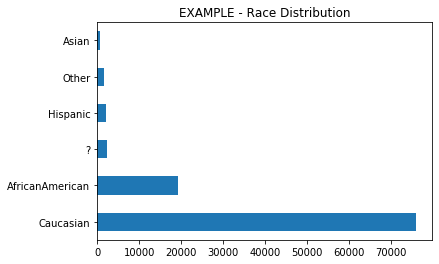

(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.
(Example.2): There are 2273 missing values labelled as '?'.
------------------------------ ^ Example ^ ------------------------------



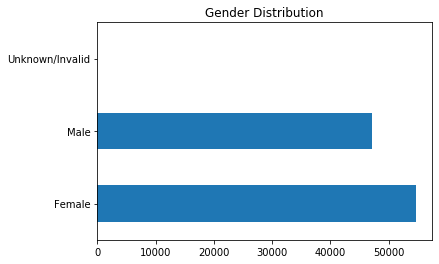

(1.1): Is the feature 'gender' well distributed? Yes, It is relatively well distributed and moderately balanced. There are 54708 females and 47055 males.
(1.2): There are 3 missing values labelled as 'Unknown/Invalid'.


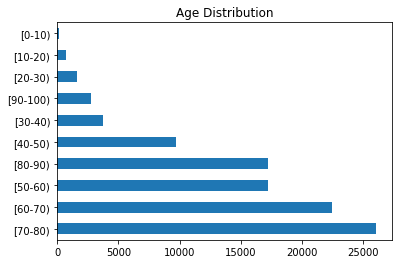

(2.1): Is the feature 'age' well distributed? Yes, It is. This feature has a relatively balanced distribution. 
(2.2): There are no missing values.


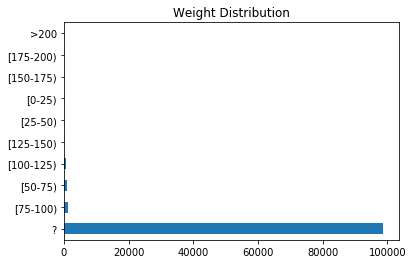

(3.1): Is the feature 'weight' well distributed? No it is not. This feature is highly imbalanced.
(3.2): There are 98569 missing values labelled as '?'.


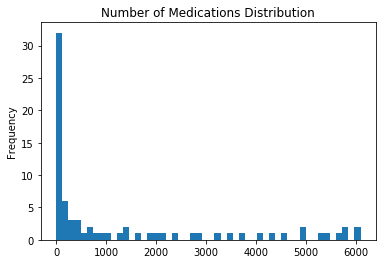

(4.1): Is the feature 'num_medications' well distributed? No it is not. This feature is highly imbalanced.
(4.2): There are no missing values.


In [106]:
# Example for the feature "race"
plt.figure() # Creates a new figure
X["race"].value_counts().plot(kind="barh", title="EXAMPLE - Race Distribution")
plt.show()
print("(Example.1): Is the above output well distributed? No it is not. This feature is highly imbalanced.")
print("(Example.2): There are 2273 missing values labelled as '?'.")

print("------------------------------ ^ Example ^ ------------------------------\n")

# MODIFY AND ANSWER THE BELOW BASED ON THE EXAMPLE ABOVE.
# gender
plt.figure() # Creates a new figure
X["gender"].value_counts().plot(kind="barh", title="Gender Distribution")
plt.show()
print("(1.1): Is the feature 'gender' well distributed? Yes, It is relatively well distributed and moderately balanced. There are 54708 females and 47055 males.")
print("(1.2): There are 3 missing values labelled as 'Unknown/Invalid'.")

# age
plt.figure() # Creates a new figure
X["age"].value_counts().plot(kind="barh", title="Age Distribution")
plt.show()
print("(2.1): Is the feature 'age' well distributed? Yes, It is. This feature has a relatively balanced distribution. ")
print("(2.2): There are no missing values.")

# weight
plt.figure() # Creates a new figure
X["weight"].value_counts().plot(kind="barh", title="Weight Distribution")
plt.show()
print("(3.1): Is the feature 'weight' well distributed? No it is not. This feature is highly imbalanced.")
print("(3.2): There are 98569 missing values labelled as '?'.")

# num_medications
plt.figure() # Creates a new figure
X["num_medications"].value_counts().plot(kind="hist", bins = 50, title="Number of Medications Distribution")
plt.show()
print("(4.1): Is the feature 'num_medications' well distributed? No it is not. This feature is highly imbalanced.")
print("(4.2): There are no missing values.")

**4. Preparing the dataset for experimentation**

We will do different steps to prepare the data for experimentations:  (1) extracting the class we wish to predict, (2) splitting the dataset into a training and a test set

In [107]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [108]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
# Look at the shape of the outputs
print(X_train.shape)
print(y_test.shape)

(81412, 49)
(20354,)


In [110]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Setting up our one-hot encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# Make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# Perform the one-hot encoding using our one-hot encoder on the selected feature set
ohe.fit(X_train_sf)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [111]:
# The one-hot-encoder renames the features. Let's take a look at the new names.
feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [112]:
# We can now encode the training and test set with the new features
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO DO) Q3 - 1 mark**   
How many features are there now, after the one-hot-encoder? Why so many? Show the shape of the training set now.

In [151]:
# How many features are there now (must get from code)?
import numpy as np
num_columns = np.shape(X_train_sf_encoded)[1]
print('After the one-hot-encoder, number of features in the train set are:', num_columns)
print('\n')

# Why so many?
# This is because one-hot-encoder assigns a separate future to each unique value.
# By this way the discrete values are converted to the continuous values which is desirable for NN to function.

# Show the shape of the training set after the one-hot encoding.
print('The first 5 rows for the training set after one-hot encoding are shown below:')
X_train_sf_encoded[:5]  

After the one-hot-encoder, number of features in the train set are: 242


The first 5 rows for the training set after one-hot encoding are shown below:


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**5. Baseline model**  
Now that we have setup our encoded features we will start by using a Logistic Regression Classifier to perform supervised learning on our dataset.

***5.1 Defining the Logistic Regression Classifier***   
First we will define our Logistic Regression Classifier with scikit learn.

In [152]:
# Import the Logistic Regression model from scikit and matplot
from sklearn.linear_model import LogisticRegression
import datetime

In [153]:
# Define the model
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)

***5.2 Training the Logistic Regression Classifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*.

In [154]:
# This function trains a given model and returns a list of scores
#   clf:     The untrained model to train
#   X_train: The encoded attributes of the training set
#   y_train: The target values of the training set
def train_model(clf, X_train, y_train, epochs=10):
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

**(TO DO) Q4 - 1 mark**   
Looking at the function train_model, what is the *score* (clf.score())? You may need to look at the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the LogisticRegression to understand this. Explain below.

Q4 - ANSWER HERE 
score or (clf.score())
Returns the 'mean accuracy' on the given test data and labels. Basically, score method is used to get the accuracy of model. The higher the score the better the model is.

In [155]:
# Now let's train the model (recall that we use the training set)
# We run for only one epoch and will only get one score
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train, 1)
print(clf_lr_scores)

Starting training...
Epoch:1/1 -- 2020-10-31 19:00:49.237819
Done training.
[0.5436299317053997]


**(TO DO) Q5 - 2 marks**   
In the answer field below, describe what the output from the code below means and what the code is doing.  
Afterwards, give the accuracy of the printed results (just manually state it, no need to code).

In [156]:
# Show the prediction on the first 10 examples
y_predicted = clf_lr.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf_lr.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
['>30' 'NO' 'NO' 'NO' '>30' '<30' '<30' '<30' '>30' '>30']


array([[0.0616956 , 0.3343657 , 0.6039387 ],
       [0.08765123, 0.26472356, 0.64762522],
       [0.06825213, 0.34944392, 0.58230396],
       [0.12201376, 0.34584269, 0.53214355],
       [0.09699535, 0.29884961, 0.60415504],
       [0.1173967 , 0.36005216, 0.52255114],
       [0.08803169, 0.34991834, 0.56204996],
       [0.08059042, 0.29091698, 0.6284926 ],
       [0.09610412, 0.35274705, 0.55114882],
       [0.17707495, 0.40978808, 0.41313697]])

TO DO - Answers   

1) Describe what y_predicted is: 

The first 10 examples of the training set are given to the learned model to precidet the labels/tags of output data from model. y_predited is the predicted class of these 10 example data. 

2) Describe what y_train[0:10] is: 

It is the actual label/tag of the first training data before feed in to the learned model. Basically, we can compare y_train (actual labels) to the y_predited (predicted labels) to find out how good is the model to predict the class of the sample data.

3) Describe clf_lr.predict_proba(X_train_sf_encoded[0:10]):  
In binary classification for labels 0 and 1, the Predict_proba() function gives the only probability of 1. The first 10 examples of the training set are fed into predict_proba() function to predict the probability of correct prediction of the data based on the learned model.

4) What is the accuracy of the printed results?

Accuracy = Number of correct predictions / Total number of predictions.
For the given example: 3/10 = 0.3

**5.3 Testing the Logistic Regression Model**   
Now that we have our trained model, let's test it on the test set.

**(TO DO) Q6 - 2 marks**   
Evaluate the model on the test set by computing it's *score* (recall how the score is computed when training) and compare that to the training set scores (you have this value from clf_lr_scores). Print which is better and give one reason why these results may have ended up this way.

In [163]:
# The test set is encoded in here: X_test_sf_encoded
# Need to compute test score, print it, compare to train score, and print which is better and why
clf_lr_scores_test = train_model(clf_lr, X_test_sf_encoded, y_test, 1)
print('clf_lr_scores_test:', clf_lr_scores_test)
print('clf_lr_scores_train:', clf_lr_scores)

Starting training...
Epoch:1/1 -- 2020-10-31 20:56:19.533460
Done training.
clf_lr_scores_test: [0.5446595263830205]
clf_lr_scores_train: [0.5436299317053997]


In [181]:
clf_lr_scores_test - clf_lr_scores_train = 0.00102959467
The test score is higher than train score. The difference is: 0.00102959467
Score here is defined as the mean accuracy and ...
when the test score is higher it means the test set and the model had better performance than the train set.

**6. MLP**   
After working with our Baseline model, let's try using a Multi Layer Perceptron Classifier to try to perform supervised learning on our dataset.

***6.1 Defining the MLPClassifier***   
First we will define our MLPClassifier with scikit learn.

In [182]:
# Import the MLP model from scikit and matplot
from sklearn.neural_network import MLPClassifier

In [183]:
# Define the model
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=5, max_iter=120, learning_rate_init=0.01, warm_start=True)

**(TO DO) Q7 - 3 marks**   
Explain *in your own words* the parameters chosen above. What do they all mean and explain how the chosen values for each parameter will affect the model. For any that are unfamiliar, explore the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and just provide a short sentence on what the parameter does based on its description and your existing knowledge.      

Q7 - ANSWER HERE   

*solver:* 
Specifies the algorithm for weight optimization across the nodes. The gradient descent method is a good example. The solver has many other forms depending on the size of datasets and mathematical approach used to optimize the weights. Here the solver is 'lbfgs' which is suitable for small datasets and uses quasi-Newton mathematical methods.

*alpha:* 
Alpha is a parameter for regularization term, aka penalty term (usually L2 penalty), that combats overfitting by constraining the size of the weights. It helps to keep the model simple and do not make it unnecessary complex. Here the alpha has the value of 0.0001 which is usually the default value for L2 penalty.

*hidden_layer_size:*  
This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Basicaaly, the ith element represents the number of neurons in the ith hidden layer. Here the hidden_layer_size is (150,150) which means we have two hidden layers and at each hidden layer there are 150 nodes.

*random_state:*  
This parameter allows to set a seed for reproducing results across multiple function calls. It also determines random number generation for weights and bias initialization in adition to the train-test split. Using an int (here the 'random_state' value is 5) will produce the same results across different calls. 

*max_iter:* 
This is the maximum number of iterations that the solver iterates until convergence or reach the max number of iterations. It denotes how many times each data point will be used. Here the value for max_iter is 120 and it means the solver will run until convergence or until the iteration process done for 120 times (and not any more!).

*learning_rate_init:* 
This parameter scales the magnitude of weight updates in order to minimize the model's error. Basically, it controls the step-size in updating the weights. If learning_rate_init is set too low, training will progress very slowly with very tiny updates to the weights. However, if the learning_rate_init is set too high it can cause undesirable divergent behavior in model's error. Here the learning_rate_init is 0.01 which is a reasonable number with moderate rate. 

*warm_start:*  
warm_start = 'true' menans, it reuses the solution of the previous call to fit as initialization that leads to speed improvements. In this case, it takes the advantage of reusing precomputed results in the previous steps of the cross-validation process. When it set to 'false', just erases the previous solution and starts from scratch.

***6.2 Training, Testing, and Discussing the MLPClassifier***  
Now that the model is defined, we need to train our model with the train set to learn how to classify our target class *readmitted*. This time we will be training the MLP model for several epochs with an updated training algorithm. Finally we will plot our retrieved scores, discuss them, and compare them with with the Baseline Model.

In [184]:
# Plots the train and the test scores
def plotScores(scores_train, scores_test):
    # Plot the points
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    # Setup the legend
    plt.legend(["Train scores", "Test Scores"])
    # Labels for the x and y axis
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

**(TO DO) Q8 - 6 marks**   

***For all parts of this question, ensure that you have the full, correct output in your submission (do not clear the output here).***

1. You must define the function train_and_evaluate() below. This function must take as input a classifier, the training set, the testing set, and the number of epochs. Inspired from the provided function train_model(), train the model as usual (use 10 epochs as the default), but now track the scores from both the train and the test sets at each epoch. Return both of these results.  
2. Once defined, train clf_mlp with train_and_evaluate() for ten epochs.
3. Take the MLPClassifier results and plot them with the plotting function above (*plotScores*).   
4. Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean? 
5. Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?
6. Here we track the *score* as we train the model. This is useful to track how the training is going. Given your previous answer on what the *score* is, what would be another useful metric to track while training these models. Specifically, what are we *minimizing* while training?

In [216]:
# TO DO part 1 - Create the train_and_evaluate function
def train_and_evaluate(clf, X_train, y_train, X_test, y_test, epochs):
    train_scores = []
    test_scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        train_scores.append(train_score)
        test_score = clf.score(X_test, y_test)
        test_scores.append(test_score)
    print("Done training, train_scores: ", train_scores)
    print("Done evaluating, test_scores: ", test_scores)
    return train_scores, test_scores

In [217]:
# TO DO part 2
# Train for *10* epochs, NOT 1. This will take a while so be patient!
# You may see a warning message, this is because we defined clf_mlp to stop early if a condition is met.
# In reality, you would want the model to go for as long as it needs to appropriately learn from the training set.
train_scores_mlp, test_scores_mlp = train_and_evaluate(clf_mlp, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test, 10)

Starting training...
Epoch:1/10 -- 2020-11-01 10:20:14.628245


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:2/10 -- 2020-11-01 10:23:07.016934


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:3/10 -- 2020-11-01 10:25:53.877231


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:4/10 -- 2020-11-01 10:28:30.810545


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:5/10 -- 2020-11-01 10:31:09.791459


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:6/10 -- 2020-11-01 10:33:54.106577


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:7/10 -- 2020-11-01 10:36:36.051466


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:8/10 -- 2020-11-01 10:39:21.882629


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:9/10 -- 2020-11-01 10:42:01.195022


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:10/10 -- 2020-11-01 10:44:35.011716


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Done training, train_scores:  [0.5550410258929888, 0.5570923205424262, 0.5579275782439935, 0.5591804647963445, 0.5603596521397337, 0.5608878298039601, 0.5613668746622119, 0.5615756890876038, 0.5614160074681865, 0.562177565960792]
Done evaluating, test_scores:  [0.5448069175592021, 0.5423503979561757, 0.5416134420752677, 0.5410238773705414, 0.5401395303134519, 0.5400903999213914, 0.5381743146310307, 0.538469096983394, 0.5381251842389703, 0.5373882283580623]


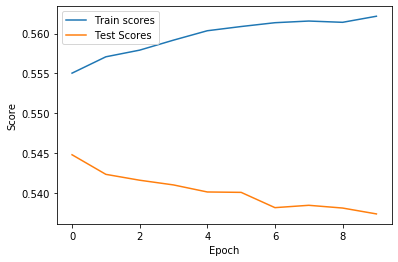

In [218]:
# TO DO part 3 - Visualize the results
plotScores(train_scores_mlp, test_scores_mlp)

Starting training...
Epoch:1/10 -- 2020-11-01 11:27:59.768079
Epoch:2/10 -- 2020-11-01 11:28:32.926980
Epoch:3/10 -- 2020-11-01 11:29:07.317663
Epoch:4/10 -- 2020-11-01 11:29:40.882135
Epoch:5/10 -- 2020-11-01 11:30:11.855976
Epoch:6/10 -- 2020-11-01 11:30:42.765074
Epoch:7/10 -- 2020-11-01 11:31:13.503860
Epoch:8/10 -- 2020-11-01 11:31:43.910631
Epoch:9/10 -- 2020-11-01 11:32:14.557316
Epoch:10/10 -- 2020-11-01 11:32:45.136718
Done training, train_scores:  [0.5436299317053997, 0.5436299317053997, 0.5436299317053997, 0.5436299317053997, 0.5436299317053997, 0.5436299317053997, 0.5436299317053997, 0.5436299317053997, 0.5436299317053997, 0.5436299317053997]
Done evaluating, test_scores:  [0.539402574432544, 0.539402574432544, 0.539402574432544, 0.539402574432544, 0.539402574432544, 0.539402574432544, 0.539402574432544, 0.539402574432544, 0.539402574432544, 0.539402574432544]


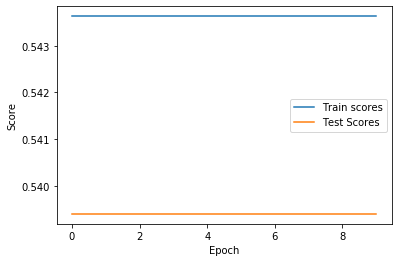

In [222]:
# Answer for Q8 TO DO part 5, need to compare plots for MLP and baseline models
train_scores_lr, test_scores_lr = train_and_evaluate(clf_lr, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test, 10)
plotScores(train_scores_lr, test_scores_lr)

TO DO part 4    
Describe the behaviour of the scores found during the training. Did the train or the test set produce the best results? What do these results mean?  
An epoch indicates the number of passes of the entire training dataset the algorithm has completed. Here, by increasing the number of epoches the score (i.e. mean acuracy) of the test set decreases and the score of the train set increases. In other words, by increasing the number of epoches, the accuracy of the train set become better and the accuracy of the test set become worse. For existing MLP method, the train set produce better results compare to the test set.


TO DO part 5   
Did the MLP do better or worse than the Baseline Logistic Regression Model (and by how much)? Why do you think that it did better/worse?  
The MLP do better than the Baseline model. As expected, the score of Baseline model is constant for 10 epoches. Starting score for Baseline model for train set is 0.5436299317053997 which is lower than the starting score for MLP model for train set as 0.5550410258929888. This means the score (i.e. mean accuracy) of MLP model indicates higher performance than Baseline model as of 0.01141109418 score value. The same thing for test set, the score of MLP model indicates higher performance than Baseline model as of 0.00540434312 score value. 


TO DO part 6   
Here we track the *score* as we train the model. This is useful to track how the training is going. Given your previous answer on what the *score* is, what would be another useful metric to track while training these models. Specifically, what are we *minimizing* while training?    
In general, a model is designed to learn patterns that generalize well on unseen/test data instead of just using the train. When a model is ready, it can be used to predict the answer on the evaluation/test data set and then compare the predicted target to the actual answer (ground truth). The goal is to *minimize* the error/difference between the predicted target and the actual answer. The comparison between predicted and actual values is performed based on a number of different metrics. The choice of actual metric depends on the ML problem in hand. For binary classification the popular metrics are: accuracy, precision and recall.

**7. Trying a slightly different model with different feature selection**  
Now that we have run through the Baseline and the MLP classifiers, let us try one more MLP with a smaller feature selection. This time you will be creating the model by with random features to use from our original list of features. The following TO DO gives an overview of the entire task.

**(TO DO) Q9 - 5 marks**   
First, insert a seed of your choice for the randomization.  
Create a new list of features containing a random four features from featureSet, we call this list randomFeatures. Then use that list to complete the encoding process using ohe_rand.   
Once done, use the train_and_evaluate() function to train the model with the new training set. Plot the results. Finally compare the train and test results from clf_rand (obtained here) with the results from clf_mlp (state which did better, posting the scores and the random feature set selected).

In [219]:
import random

# Setup a seed
random.seed(30)

# Setting up our one-hot encoder
ohe_rand = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Since the dataset is quite large, try with a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# TO DO - Select a random four unique features from the list featureSet
randomFeatures = ['gender','weight','num_lab_procedures','num_medications']
print(randomFeatures)

# TO DO - Finish the remaining encoding process
# Make a copy of the training set containing only the chosen features
X_train_rand = X_train[randomFeatures].copy()
X_test_rand = X_test[randomFeatures].copy()

# Perform the one-hot encoding using our one-hot encoder on the selected feature set
ohe_rand.fit(X_train_rand)

# The one-hot-encoder renames the features. Let's take a look at the new names.
feature_names = ohe_rand.get_feature_names()
print(feature_names)

# We can now encode the training and test set with the new features
X_train_rand_encoded = ohe_rand.transform(X_train_rand)
X_test_rand_encoded = ohe_rand.transform(X_test_rand)

['gender', 'weight', 'num_lab_procedures', 'num_medications']
['x0_Female' 'x0_Male' 'x0_Unknown/Invalid' 'x1_>200' 'x1_?' 'x1_[0-25)'
 'x1_[100-125)' 'x1_[125-150)' 'x1_[150-175)' 'x1_[175-200)' 'x1_[25-50)'
 'x1_[50-75)' 'x1_[75-100)' 'x2_1' 'x2_2' 'x2_3' 'x2_4' 'x2_5' 'x2_6'
 'x2_7' 'x2_8' 'x2_9' 'x2_10' 'x2_11' 'x2_12' 'x2_13' 'x2_14' 'x2_15'
 'x2_16' 'x2_17' 'x2_18' 'x2_19' 'x2_20' 'x2_21' 'x2_22' 'x2_23' 'x2_24'
 'x2_25' 'x2_26' 'x2_27' 'x2_28' 'x2_29' 'x2_30' 'x2_31' 'x2_32' 'x2_33'
 'x2_34' 'x2_35' 'x2_36' 'x2_37' 'x2_38' 'x2_39' 'x2_40' 'x2_41' 'x2_42'
 'x2_43' 'x2_44' 'x2_45' 'x2_46' 'x2_47' 'x2_48' 'x2_49' 'x2_50' 'x2_51'
 'x2_52' 'x2_53' 'x2_54' 'x2_55' 'x2_56' 'x2_57' 'x2_58' 'x2_59' 'x2_60'
 'x2_61' 'x2_62' 'x2_63' 'x2_64' 'x2_65' 'x2_66' 'x2_67' 'x2_68' 'x2_69'
 'x2_70' 'x2_71' 'x2_72' 'x2_73' 'x2_74' 'x2_75' 'x2_76' 'x2_77' 'x2_78'
 'x2_79' 'x2_80' 'x2_81' 'x2_82' 'x2_83' 'x2_84' 'x2_85' 'x2_86' 'x2_87'
 'x2_88' 'x2_89' 'x2_90' 'x2_91' 'x2_92' 'x2_93' 'x2_94' 'x2_95' 'x

Starting training...
Epoch:1/10 -- 2020-11-01 10:53:12.815700


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:2/10 -- 2020-11-01 10:56:17.544935


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:3/10 -- 2020-11-01 10:59:29.370453


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:4/10 -- 2020-11-01 11:02:45.547065


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:5/10 -- 2020-11-01 11:05:53.672724


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:6/10 -- 2020-11-01 11:09:05.334401


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:7/10 -- 2020-11-01 11:12:22.777924


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:8/10 -- 2020-11-01 11:15:38.324176


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:9/10 -- 2020-11-01 11:18:52.106450


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:10/10 -- 2020-11-01 11:22:12.954425


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Done training, train_scores:  [0.5626566108190438, 0.5764752124993858, 0.5828747604775709, 0.5865105881196875, 0.5887092811870486, 0.5897287869110205, 0.5902692477767405, 0.5909816734633715, 0.5909202574559033, 0.5914484351201297]
Done evaluating, test_scores:  [0.5199469391765746, 0.507615210769382, 0.5060921686155055, 0.5028986931315712, 0.5029969539156922, 0.5033408666601159, 0.5038321705807213, 0.5018669548983001, 0.5048147784219318, 0.5030460843077528]


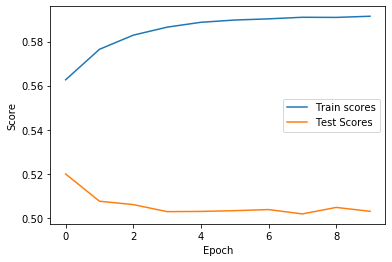

In [221]:
clf_rand = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=5, max_iter=120, learning_rate_init=0.01, warm_start=True)

# TO DO - Train the model (this will take a little while! Grab a snack or find something to do), plot the results
train_scores_rand, test_scores_rand = train_and_evaluate(clf_rand,X_train_rand_encoded,y_train,X_test_rand_encoded,y_test, 10)

plotScores(train_scores_rand, test_scores_rand)

TO DO - State the random feature set obtained. Compare the train and test results from clf_rand to clf_mlp, posting the scores from both.   
For the random feature set, by increasing the number of epoches the score (i.e. mean acuracy) of the test set decreases and the score of the train set increases. In other words, by increasing the number of epoches, the accuracy of the train set become better and the accuracy of the test set become worse. For existing Random method, the train set produce better results compare to the test set. However, For both train set and test set, the score rate saturates around epoch = 4 and after that there is almost constant value for both train scores and test scores.

Random method start train score: 0.5626566108190438
MLP method start train score: 0.5550410258929888
Difference between start train score for Random method and MLP method: 0.00761558492
Before epoch 4, Random method had better performance on train score compare to MLP method by score value of 0.00761558492. After epoch 4, MLP method has increasing score behaviour and the performance become better compare to Random model.

Random method start test score: 0.5199469391765746
MLP method start test score: 0.5448069175592021
Difference between start test score for MLP method and Random method: 0.02485997838
Before epoch 4, MLP method had better performance on test score compare to Random method by score value of 0.02485997838. After epoch 4, the MLP method has decreasing score behaviour but Random method score value is constant. This means after epoch 4, Random method has better performance compare to MLP method.

**8. Looking at the loss curve**  
We will do one final run of a MLP, but this time we will use solver="SGD". Using this allows us to look at the loss curve during it's training.

In [223]:
clf_sgd = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=150, learning_rate_init=0.1, warm_start=True)

In [224]:
# Plots the loss from the trained model
# NOTE: clf.loss_curve_ only exists when using solver="SGD"
def plot_loss(clf):
    plt.plot(clf.loss_curve_)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

**(TO DO) Q10 - 3 marks**   
Train and evaluate the model using train_and_evaluate (for 1 epoch*) on X_train_sf_encoded and X_test_sf_encoded. Display the plot exhibiting the loss function when being trained. Briefly describe what the loss function represents (and why it's important).

Starting training...
Epoch:1/1 -- 2020-11-01 11:44:59.769969


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Done training, train_scores:  [0.8523313516434924]
Done evaluating, test_scores:  [0.44345091873833153]


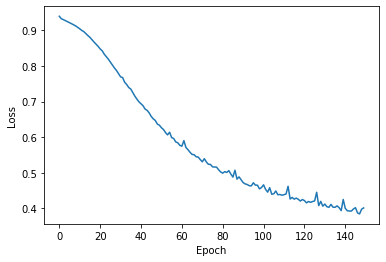

In [225]:
# Train the model for *1 epoch* (with X_train_sf_encoded and X_test_sf_encoded)
train_scores_sgd, test_scores_sgd = train_and_evaluate(clf_sgd,X_train_sf_encoded,y_train,X_test_sf_encoded,y_test, 1)
# Plot the loss of clf_sgd
plot_loss(clf_sgd)

TO DO - What does the loss curve represent and why is it important?   
The loss is a number indicating how bad the model's prediction is on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples. The lower the loss value, the better the model is.
Here, as expected, the loss value decreases by incresing the number of epoches. This proves having more training data helps to increase the performance of a model.

**(TO DO) Optional - 0 marks, just for fun**   
Play around with the MLPClassifier by modifying the hyperparameters and selecting specific features to optimize the test score.   

**Another optional task is to use the Keras Scikit-Learn wrapper**  

You will need to pip install keras beforehand, but this will drastically reduce the training time for simple models such as the ones that we have worked with above. Below is just one example of how to create a model with this wrapper.  

```python   
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(150, input_dim=241, activation="relu"))
    model.add(Dense(150, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model
   
model = KerasClassifier(build_fn=create_model, epochs=10)
history = model.fit(X_train_sf_encoded, y_train)```

***SIGNATURE:***
My name is Fatemeh Soltani.
My student number is 300139153.
I certify being the author of this assignment.